In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from scipy.io import wavfile as wav
import librosa
import matplotlib.pyplot as plt
import random
import os
import tensorflow
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from os.path import isfile, join
import sklearn.decomposition as skdec
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import RocCurveDisplay,roc_auc_score,roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
import seaborn as sns
import pathlib
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM,Dense, Flatten, TimeDistributed, RepeatVector,Bidirectional

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Feature extraction**

In [ ]:
X = []
Y = []
genres = 'D_0 D_1 D_2 D_3 D_4 D_5 D_6'.split()
for g in genres:
    for filename in os.listdir(f'/content/drive/MyDrive/{g}'):
        songname = f'/content/drive/MyDrive/{g}/{filename}'
        try:
          y, sr = librosa.load(songname, mono=True)
          feature = librosa.feature.mfcc(y=i , n_mfcc = 128)
          new_data = np.concatenate([np.std(feature, axis = 1),np.mean(feature, axis = 1)])
          X.append(new_data)
          Y.append(g)
        except:
          print(filename)
          pass;      

In [ ]:
Y_df = pd.DataFrame(Y)
Y_df.to_csv('/content/drive/MyDrive/Y2.csv', index=False)
X_df = pd.DataFrame(X)
X_df.to_csv('/content/drive/MyDrive/X2.csv', index=False)

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/X2.csv')
Y = pd.read_csv('/content/drive/MyDrive/Y2s.csv')

# **Feature reduction**

In [ ]:
pca = skdec.PCA(0.995, whiten = True)
X_red = pca.fit_transform(X)
X_red.shape

(906, 110)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_red, Y, test_size=0.25, random_state=42)

In [ ]:
# clf = SVC(gamma='auto' , C = 1)
# sfs = SequentialFeatureSelector(clf, n_features_to_select=30 , n_jobs = -1)
# sfs.fit(X_train ,y_train)
# new_X_sel = sfs.transform(X)

In [ ]:
X_train.shape

(679, 110)

# **K Nearest, SVM, Logistic Regression, MLP, Naive Bayes**

In [ ]:
names = [
    "Nearest Neighbors",
    "RBF SVM With C = 1",
    "Logistic Regression",
    "Neural Net",
    "Naive Bayes",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma='auto' , C = 0.5, probability = True),
    LogisticRegression(random_state=0),
    MLPClassifier(learning_rate_init = 0.0002 , learning_rate = "adaptive", alpha=0.1, hidden_layer_sizes = (500,100), early_stopping= True, max_iter=10000),
    GaussianNB(),
]

Classification with: Nearest Neighbors
              precision    recall  f1-score   support

         D_0       0.32      0.53      0.40        34
         D_1       0.42      0.65      0.51        23
         D_2       0.40      0.33      0.36        48
         D_3       0.53      0.35      0.42        26
         D_4       0.44      0.47      0.46        34
         D_5       0.43      0.45      0.44        29
         D_6       0.83      0.30      0.44        33

    accuracy                           0.43       227
   macro avg       0.48      0.44      0.43       227
weighted avg       0.48      0.43      0.43       227



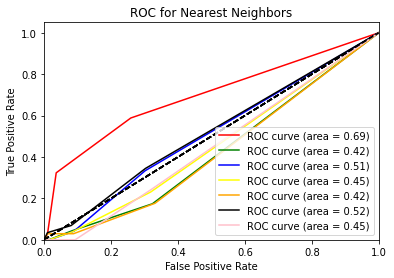

-------------------------------------------------------
Classification with: RBF SVM With C = 1
              precision    recall  f1-score   support

         D_0       0.80      0.12      0.21        34
         D_1       0.73      0.35      0.47        23
         D_2       0.71      0.10      0.18        48
         D_3       0.16      0.85      0.27        26
         D_4       0.60      0.09      0.15        34
         D_5       0.43      0.76      0.55        29
         D_6       0.80      0.24      0.37        33

    accuracy                           0.32       227
   macro avg       0.60      0.36      0.31       227
weighted avg       0.62      0.32      0.29       227



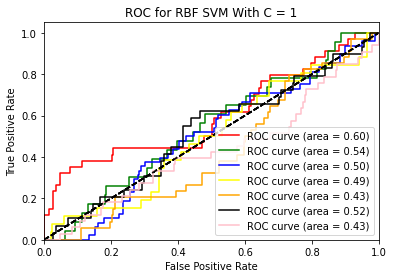

-------------------------------------------------------
Classification with: Logistic Regression
              precision    recall  f1-score   support

         D_0       0.38      0.24      0.29        34
         D_1       0.35      0.57      0.43        23
         D_2       0.49      0.35      0.41        48
         D_3       0.22      0.27      0.24        26
         D_4       0.22      0.21      0.21        34
         D_5       0.44      0.62      0.51        29
         D_6       0.45      0.39      0.42        33

    accuracy                           0.37       227
   macro avg       0.36      0.38      0.36       227
weighted avg       0.37      0.37      0.36       227



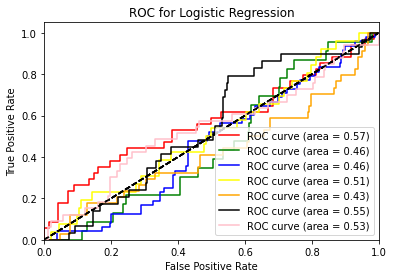

-------------------------------------------------------
Classification with: Neural Net
              precision    recall  f1-score   support

         D_0       0.38      0.29      0.33        34
         D_1       0.38      0.61      0.47        23
         D_2       0.42      0.17      0.24        48
         D_3       0.25      0.50      0.33        26
         D_4       0.60      0.26      0.37        34
         D_5       0.35      0.59      0.44        29
         D_6       0.45      0.39      0.42        33

    accuracy                           0.37       227
   macro avg       0.40      0.40      0.37       227
weighted avg       0.41      0.37      0.36       227



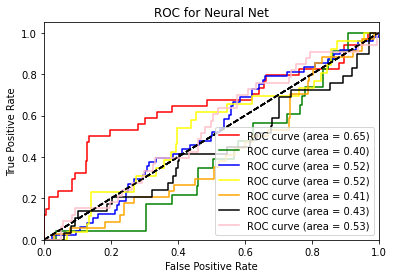

-------------------------------------------------------
Classification with: Naive Bayes
              precision    recall  f1-score   support

         D_0       0.26      0.24      0.25        34
         D_1       0.26      0.43      0.32        23
         D_2       0.50      0.25      0.33        48
         D_3       0.28      0.35      0.31        26
         D_4       0.26      0.35      0.30        34
         D_5       0.29      0.28      0.28        29
         D_6       0.37      0.30      0.33        33

    accuracy                           0.30       227
   macro avg       0.32      0.31      0.30       227
weighted avg       0.33      0.30      0.30       227



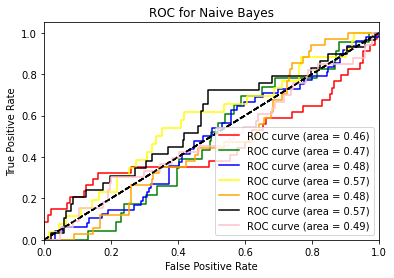

-------------------------------------------------------


In [ ]:
colors = ['red','green','blue','yellow','orange','black','pink']
for name, clf in zip(names, classifiers):
  print("Classification with: " + name )
  clf = clf.fit(X_train,y_train)
  y_pred= clf.predict(X_test)
  y_score = clf.predict_proba(X_test)
  print(metrics.classification_report(y_test,y_pred))
  classes = np.unique(y_test)
  for i in range(len(classes)):
    c = classes[i]
    cls = [1 if y==c else 0 for y in y_test.to_numpy().reshape(-1).tolist()]
    fpr, tpr, _ = roc_curve(cls, y_score[:,0])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,label='ROC curve (area = {0:0.2f})'.format(roc_auc),c=colors[i])
    plt.legend(loc="lower right")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for ' + name)
  plt.show()
  print("-" * 55)

# **Ensemble learning**

In [ ]:
xsx = [(i[0],i[1]) for i in zip(names,classifiers)]

ensclf = VotingClassifier(estimators = xsx, voting = "hard")
ensclf = ensclf.fit(X_train, y_train)
y_pred= ensclf.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         D_0       0.34      0.35      0.35        34
         D_1       0.41      0.65      0.50        23
         D_2       0.53      0.33      0.41        48
         D_3       0.30      0.54      0.39        26
         D_4       0.53      0.29      0.38        34
         D_5       0.44      0.59      0.50        29
         D_6       0.52      0.33      0.41        33

    accuracy                           0.42       227
   macro avg       0.44      0.44      0.42       227
weighted avg       0.45      0.42      0.41       227



# **Clustering**

###**K=2**

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 30)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	inertias.append(kmeanModel.inertia_)

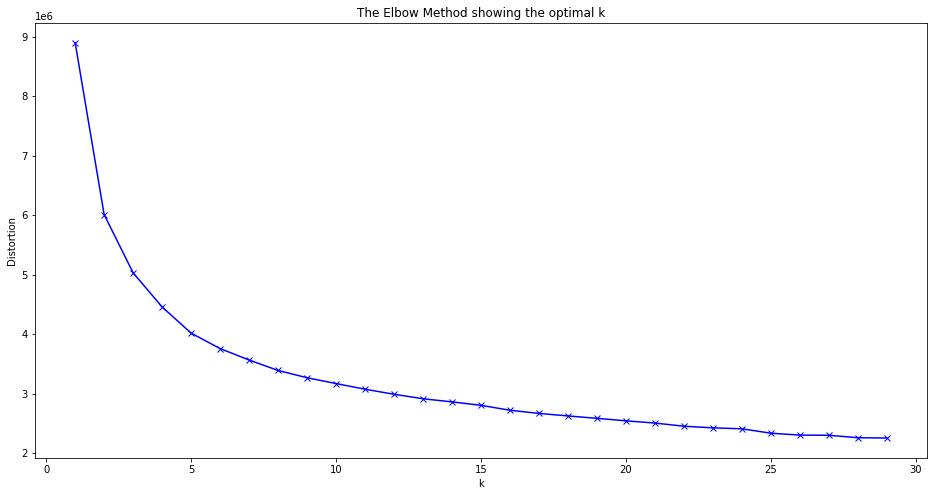

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans_1 = KMeans(n_clusters=2,init="k-means++")
kmeans_1.fit(X_red)

KMeans(n_clusters=2)

In [ ]:
print(np.round(np.array(pd.Series(kmeans_1.labels_[Y[Y['0']=='D_0'].index]).value_counts().tolist()) /Y[Y['0']=='D_0'].shape[0],decimals=2))
print(np.round(np.array(pd.Series(kmeans_1.labels_[Y[Y['0']=='D_1'].index]).value_counts().tolist()) /Y[Y['0']=='D_1'].shape[0],decimals=2))
print(np.round(np.array(pd.Series(kmeans_1.labels_[Y[Y['0']=='D_2'].index]).value_counts().tolist()) /Y[Y['0']=='D_2'].shape[0],decimals=2))
print(np.round(np.array(pd.Series(kmeans_1.labels_[Y[Y['0']=='D_3'].index]).value_counts().tolist()) /Y[Y['0']=='D_3'].shape[0],decimals=2))
print(np.round(np.array(pd.Series(kmeans_1.labels_[Y[Y['0']=='D_4'].index]).value_counts().tolist()) /Y[Y['0']=='D_4'].shape[0],decimals=2))
print(np.round(np.array(pd.Series(kmeans_1.labels_[Y[Y['0']=='D_5'].index]).value_counts().tolist()) /Y[Y['0']=='D_5'].shape[0],decimals=2))
print(np.round(np.array(pd.Series(kmeans_1.labels_[Y[Y['0']=='D_6'].index]).value_counts().tolist()) /Y[Y['0']=='D_6'].shape[0],decimals=2))

[0.57 0.43]
[0.64 0.36]
[0.62 0.38]
[0.65 0.35]
[0.57 0.43]
[0.51 0.49]
[0.62 0.38]


In [ ]:
count = list(map(lambda x:np.round(pd.Series(kmeans_1.labels_[Y[Y['0']==x].index]).value_counts() /Y[Y['0']==x].shape[0],decimals=2),np.unique(Y['0'])))
count = np.array(count).reshape(-1)

dastgah = np.array(["shoor","segah","mahoor","homayoon","rast panjgah","nava","chahar gah"]).reshape(-1,1)
dastgah = np.array([i * 2 for i in dastgah.tolist()]).reshape(-1)

clusters = [1,0]*7

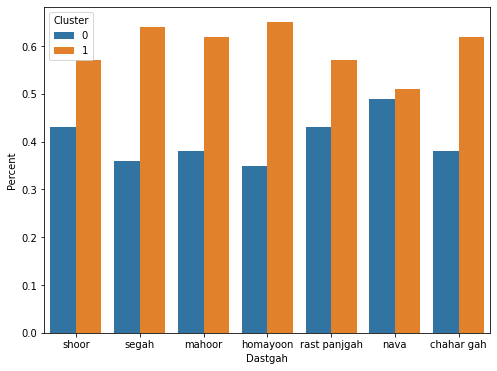

In [ ]:
cdf = pd.DataFrame({"Dastgah": dastgah.tolist(),"Percent": count, "Cluster": clusters})
plt.figure(figsize=(8,6))
sns.barplot(data=cdf, x="Dastgah", y="Percent",hue="Cluster")

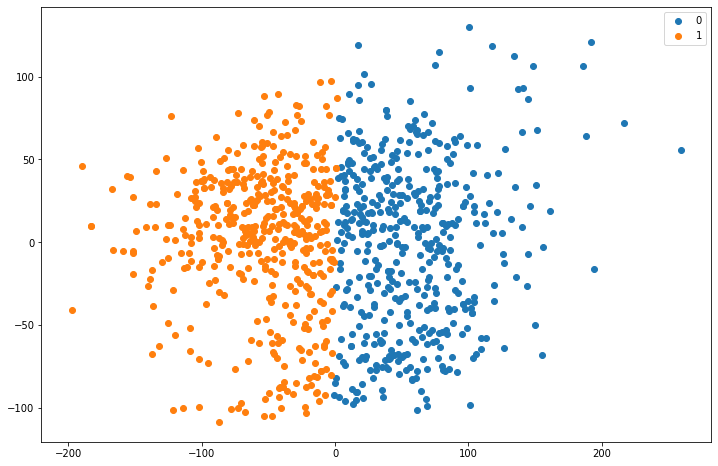

In [ ]:
pca = skdec.PCA(2)
df = pca.fit_transform(X)
label = kmeans_1.fit_predict(df)
u_labels = np.unique(label)
 
plt.figure(figsize=(12,8))
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

### **K=7**

In [ ]:
kmeans_2 = KMeans(n_clusters=7,init="k-means++")
kmeans_2.fit(X)

KMeans(n_clusters=7)

In [ ]:
count_2 = []
for item in np.unique(Y['0']):
  indexes = pd.Series(kmeans_2.labels_[Y[Y['0']==item].index]).value_counts().index.tolist()
  values = pd.Series(kmeans_2.labels_[Y[Y['0']==item].index]).value_counts().values.tolist()
  labels_list = list(zip(indexes,values))

  for i in range(7):
    if i not in indexes:
      labels_list.append((i,0))

  labels_list = sorted(np.array(labels_list).tolist(), key= lambda x:x[0])
  labels_list = list(map(lambda x:[x[0],round(x[1]/len(Y[Y['0']==item].index),2)],labels_list))
  count_2.append(np.array(labels_list)[:,1].tolist())
  
count_2 = np.array(count_2).reshape(-1)

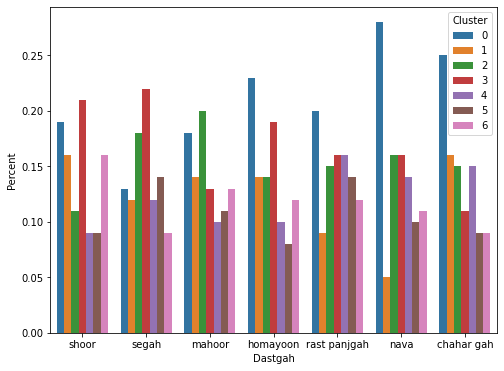

In [ ]:
dastgah_2 = np.array(["shoor","segah","mahoor","homayoon","rast panjgah","nava","chahar gah"]).reshape(-1,1)
dastgah_2 = np.array([i * 7 for i in dastgah_2.tolist()]).reshape(-1)

clusters_2 = [0,1,2,3,4,5,6]*7

cdf_2 = pd.DataFrame({"Dastgah": dastgah_2.tolist(),"Percent": count_2, "Cluster": clusters_2})
plt.figure(figsize=(8,6))
sns.barplot(data=cdf_2, x="Dastgah", y="Percent",hue="Cluster")

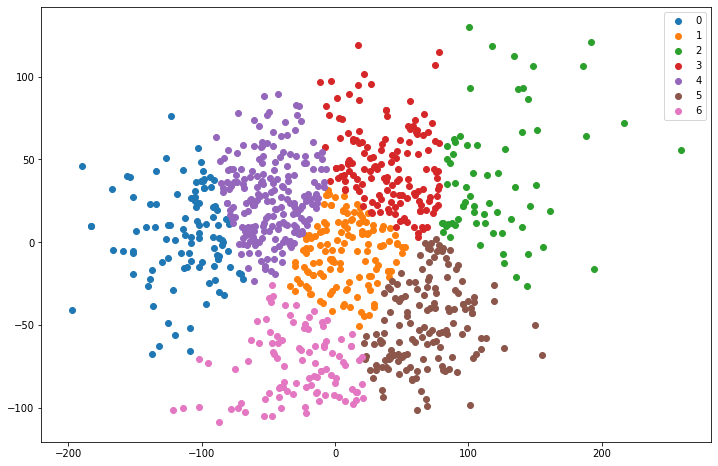

In [ ]:
pca = skdec.PCA(2)
df = pca.fit_transform(X)
label = kmeans_2.fit_predict(df)
u_labels = np.unique(label)
 
plt.figure(figsize=(12,8))
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

### **DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

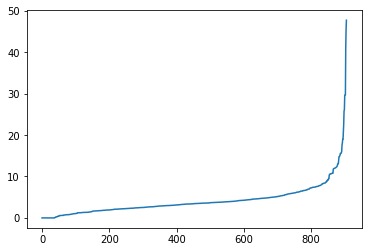

In [ ]:
pca = skdec.PCA(2)
df = pca.fit_transform(X)

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

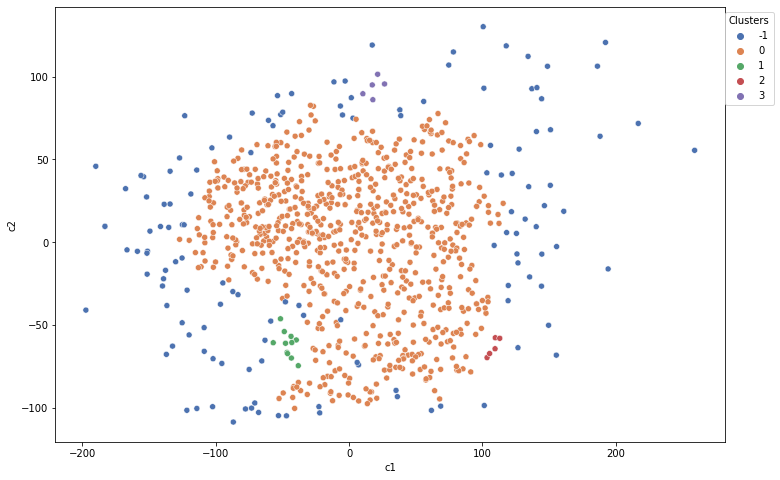

In [ ]:
m = DBSCAN(eps=10, min_samples=5)
m.fit(df)

clusters = m.labels_
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

df1 = pd.DataFrame({'c1':df[:,0], 'c2':df[:,1]})
plt.figure(figsize=(12,8))
p = sns.scatterplot(data=df1, x="c1", y="c2", hue=m.labels_, legend="full", palette="deep")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.08, 1), title='Clusters')
plt.show()

# **LSTM**

In [ ]:
import tensorflow as tf

input_shape=(110,1)
model = tf.keras.Sequential()
model.add(Bidirectional(LSTM(128,input_shape=input_shape,return_sequences=True)))
model.add(Bidirectional(LSTM(128,input_shape=input_shape)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(Dense(48, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
X_train = X_train.reshape(679,110,1)

y_train_1 = list(map(lambda x:x[0][-1],y_train.to_numpy().tolist()))
new_y_train = np.array(y_train_1).astype(int)
Y_train = to_categorical(new_y_train,num_classes=7)

y_test_1 = list(map(lambda x:x[0][-1],y_test.to_numpy().tolist()))
new_y_test = np.array(y_test_1).astype(int)
Y_test = to_categorical(new_y_test,num_classes=7)

In [ ]:
history = model.fit(X_train, Y_train, epochs=80,verbose=2)

Epoch 1/80
22/22 - 8s - loss: 1.9454 - accuracy: 0.1532 - 8s/epoch - 370ms/step
Epoch 2/80
22/22 - 1s - loss: 1.9436 - accuracy: 0.1635 - 585ms/epoch - 27ms/step
Epoch 3/80
22/22 - 1s - loss: 1.9349 - accuracy: 0.1546 - 602ms/epoch - 27ms/step
Epoch 4/80
22/22 - 1s - loss: 1.9369 - accuracy: 0.1620 - 587ms/epoch - 27ms/step
Epoch 5/80
22/22 - 1s - loss: 1.9233 - accuracy: 0.1900 - 566ms/epoch - 26ms/step
Epoch 6/80
22/22 - 1s - loss: 1.9297 - accuracy: 0.1841 - 574ms/epoch - 26ms/step
Epoch 7/80
22/22 - 1s - loss: 1.9303 - accuracy: 0.1988 - 574ms/epoch - 26ms/step
Epoch 8/80
22/22 - 1s - loss: 1.9299 - accuracy: 0.1973 - 555ms/epoch - 25ms/step
Epoch 9/80
22/22 - 1s - loss: 1.9202 - accuracy: 0.1900 - 565ms/epoch - 26ms/step
Epoch 10/80
22/22 - 1s - loss: 1.9073 - accuracy: 0.2062 - 594ms/epoch - 27ms/step
Epoch 11/80
22/22 - 1s - loss: 1.9111 - accuracy: 0.1973 - 591ms/epoch - 27ms/step
Epoch 12/80
22/22 - 1s - loss: 1.9135 - accuracy: 0.1885 - 569ms/epoch - 26ms/step
Epoch 13/80
22/

In [ ]:
yhat = model.predict(X_test)
y_pred =np.argmax(yhat, axis=1)
Y_test_new =np.argmax(Y_test, axis=1)

accuracy_score(Y_test_new, y_pred, normalize=False)

8/8 [==============================] - 1s 15ms/step


66

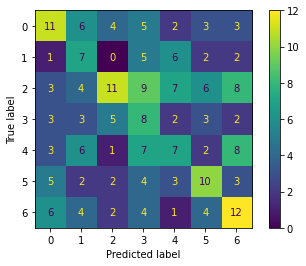

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
display_labels = [0,1,2,3,4,5,6]
cm = confusion_matrix(Y_test_new, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=display_labels)
disp.plot()
plt.show()